In [216]:
#Automated reloading of custom modules
%load_ext autoreload
%autoreload 2

#Standard modules
import os

import numpy as np
import scipy

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

#Custom modules
import helpers as hlp
import models as mdl

# Chose device automatically (if not specified)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Device: cpu


# Dataset exploration

** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (60000, 1, 28, 28) (188.64 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)


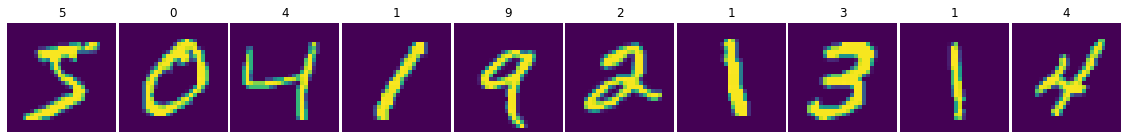

In [2]:
train_input, train_target, val_input, val_target, meta = hlp.load_data(dataset="MNIST", reduced=False, device=device)
index = range(10)
hlp.visualize_data(train_input, meta, index=index, targets=train_target)

** Using FMNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (60000, 1, 28, 28) (188.64 MB)
	- Validation (10000, 1, 28, 28) (31.44 MB)


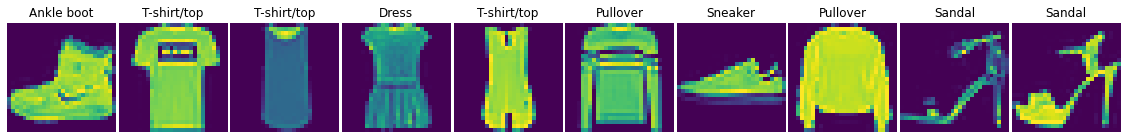

In [3]:
train_input, train_target, val_input, val_target, meta = hlp.load_data(dataset="FMNIST", reduced=False, device=device)
index = range(10)
hlp.visualize_data(train_input, meta, index=index, targets=train_target)

** Using CIFAR **
Load train data...
Files already downloaded and verified
Load validation data...
Files already downloaded and verified
Dataset sizes:
	- Train: (50000, 3, 32, 32) (614.8 MB)
	- Validation (10000, 3, 32, 32) (122.96 MB)


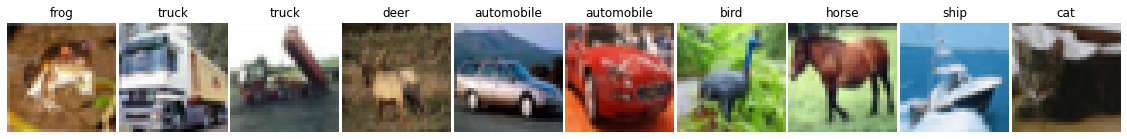

In [4]:
train_input, train_target, val_input, val_target, meta = hlp.load_data(dataset="CIFAR10", reduced=False, device=device)
index = range(10)
hlp.visualize_data(train_input, meta, index=index, targets=train_target)

** Using CIFAR **
Load train data...
Files already downloaded and verified
Load validation data...
Files already downloaded and verified
Dataset sizes:
	- Train: (50000, 3, 32, 32) (614.8 MB)
	- Validation (10000, 3, 32, 32) (122.96 MB)


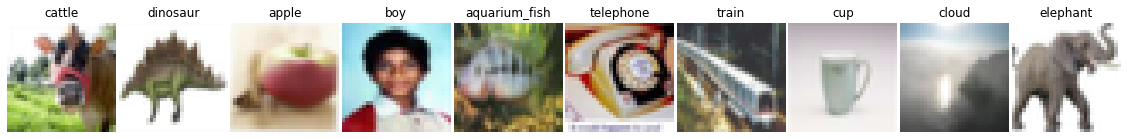

In [5]:
train_input, train_target, val_input, val_target, meta = hlp.load_data(dataset="CIFAR100", reduced=False, device=device)
index = range(10)
hlp.visualize_data(train_input, meta, index=index, targets=train_target)

** Using EMNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (112800, 1, 28, 28) (354.6432 MB)
	- Validation (18800, 1, 28, 28) (59.1072 MB)


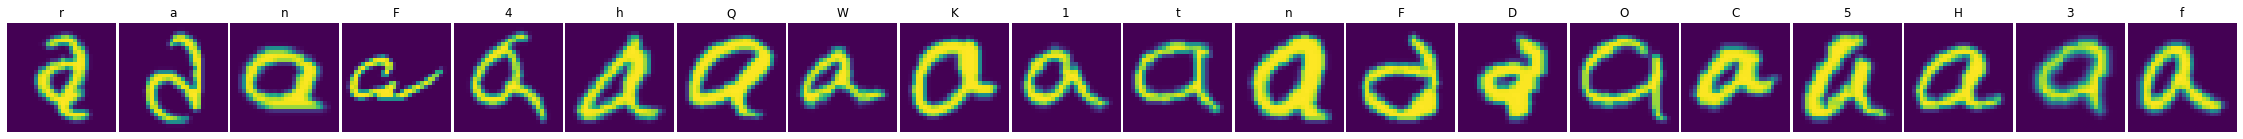

In [218]:
train_input, train_target, val_input, val_target, meta = hlp.load_data(dataset="EMNIST", reduced=False, device=device)
index = range(20)
hlp.visualize_data(train_input[train_target == 36], meta, index=index, targets=train_target)

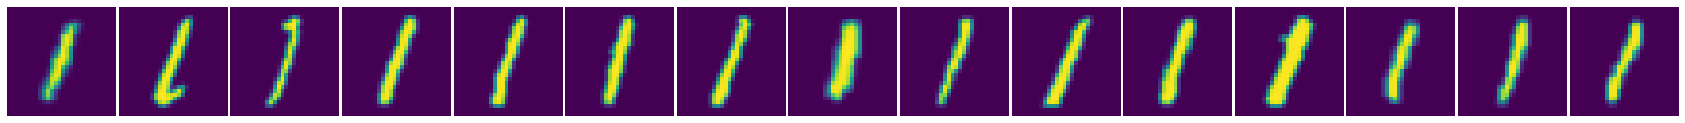

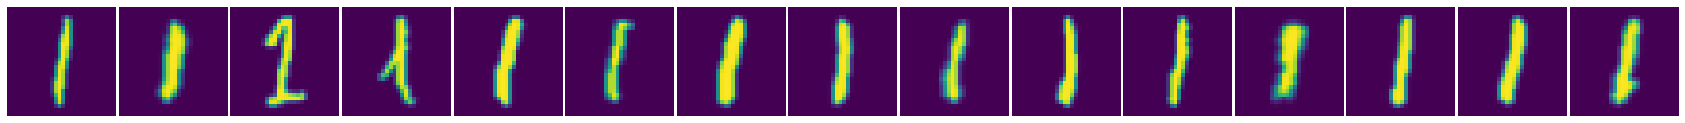

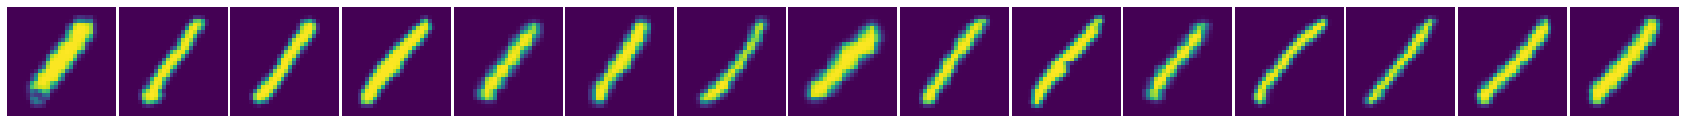

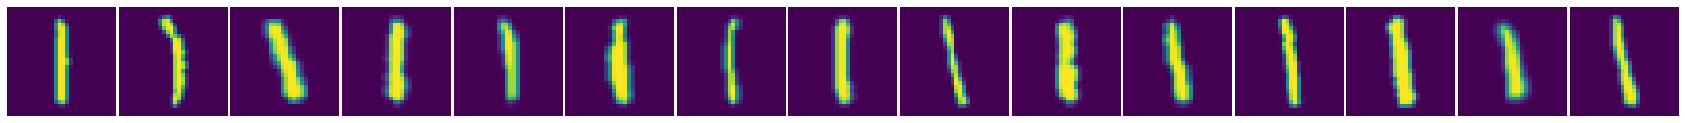

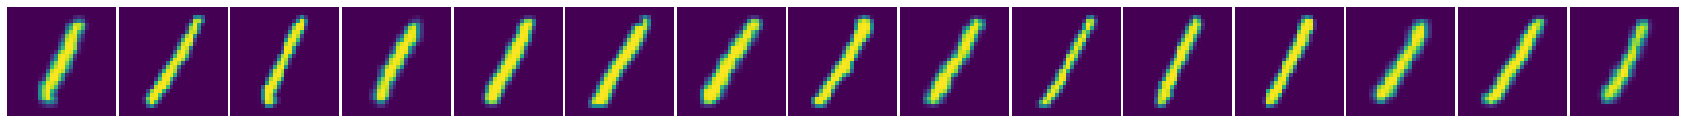

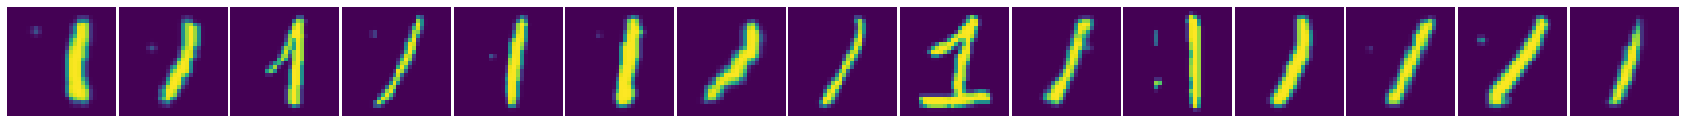

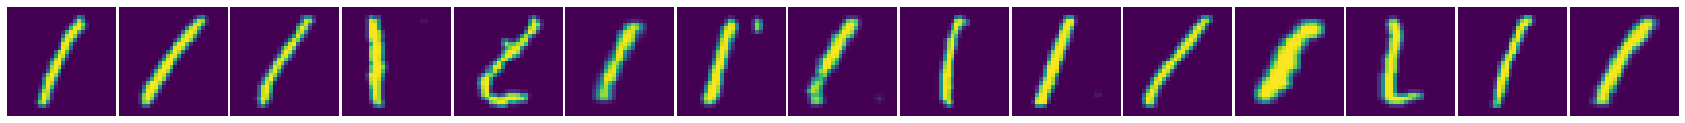

In [219]:
from sklearn.cluster import KMeans

data = train_input[train_target == 1]
n_cluster = 7
kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(data.reshape(data.shape[0], -1))
cluster_ids = kmeans.labels_
index = range(15)
for i in range(n_cluster):
    hlp.visualize_data(data[cluster_ids == i], meta, index=index)


# Thesis Figures

In [204]:
import seaborn as sns
import pandas as pd
n = 1000
def plot_distribution(data_u, data_n, savepath=None, bw=1):
    
    df_u = pd.DataFrame({"X" : data_u[:,0],
                       "Y" : data_u[:,1],
                       "Distribution" : data_u.shape[0]*["$p_u$"]}) 
    df_n = pd.DataFrame({"X" : data_n[:,0],
                       "Y" : data_n[:,1],
                       "Distribution" : data_n.shape[0]*["$p$"]}) 
    df = pd.concat([df_u, df_n], ignore_index=True)
    g = sns.jointplot(data=df,
                      x="X", y="Y", hue="Distribution", kind="kde", 
                      bw_method=bw, fill=False, 
                      marginal_kws=dict(bw_method=bw, shade=True, alpha=.2), 
                      height=3.5, legend=False)
                      #xlim=(-2.5,2.5), ylim=(-2.5,2.5))
    g.ax_joint.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    g.ax_marg_y.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    g.ax_marg_x.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    
    if savepath is not None:
        g.figure.savefig(savepath, bbox_inches='tight')

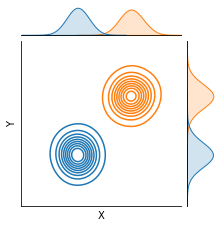

In [206]:
n = 1000

mu_u = np.array([-1,-1])
sig_u = (0.3)**2 * np.array([[1,0],[0,1]])

mu_n = np.array([1,1])
sig_n = (0.3)**2 * np.array([[1,0],[0,1]])

data_u = np.random.multivariate_normal(mu_u, sig_u, n)
data_n = np.random.multivariate_normal(mu_n, sig_n, n)

plot_distribution(data_u, data_n, savepath="figures/dist1.png")

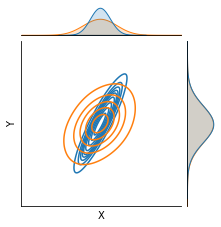

In [207]:
n = 1000

mu_u = np.array([0,0])
sig_u = (0.3)**2 * np.array([[1,0.9],[0.9,1]])

mu_n = np.array([0,0])
sig_n = (0.3)**2 * np.array([[3,0.8],[0.8,1]])

data_u = np.random.multivariate_normal(mu_u, sig_u, n)
data_n = np.random.multivariate_normal(mu_n, sig_n, n)

plot_distribution(data_u, data_n, savepath="figures/dist2.png")

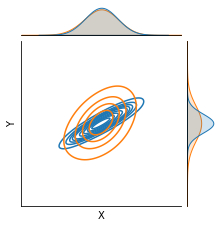

In [208]:
n = 1000

mu_u = np.array([0,0])
sig_u = (0.3)**2 * np.array([[1,0.9],[0.9,1]])

mu_n = np.array([0,0])
sig_n = (0.3)**2 * np.array([[1,0.8],[0.8,3]])

data_u = np.random.multivariate_normal(mu_u, sig_u, n)
data_n = np.random.multivariate_normal(mu_n, sig_n, n)

plot_distribution(data_u, data_n, savepath="figures/dist3.png")

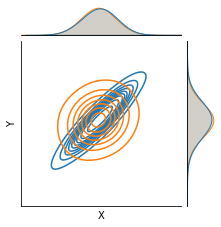

In [209]:
n = 1000

mu_u = np.array([0,0])
sig_u = (0.3)**2 * np.array([[1,0.9],[0.9,1]])

mu_n = np.array([0,0])
sig_n = (0.3)**2 * np.array([[1,0.2],[0.2,1]])

data_u = np.random.multivariate_normal(mu_u, sig_u, n)
data_n = np.random.multivariate_normal(mu_n, sig_n, n)

plot_distribution(data_u, data_n, savepath="figures/dist4.png")

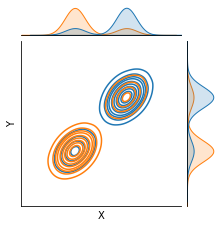

In [210]:
n = 30000
f = 0.2

mu_u1 = np.array([-1,-1])
sig_u1 = (0.3)**2 * np.array([[1,0],[0,1]])
data_u1 = np.random.multivariate_normal(mu_u1, sig_u1, int(f * n))

mu_u2 = np.array([1,1])
sig_u2 = (0.3)**2 * np.array([[1,0],[0,1]])
data_u2 = np.random.multivariate_normal(mu_u2, sig_u2, int((1-f) * n))

mu_n1 = np.array([-1,-1])
sig_n1 = (0.3)**2 * np.array([[1,0],[0,1]])
data_n1 = np.random.multivariate_normal(mu_n1, sig_n1, int((1-f) * n))

mu_n2 = np.array([1,1])
sig_n2 = (0.3)**2 * np.array([[1,0],[0,1]])
data_n2 = np.random.multivariate_normal(mu_n2, sig_n2, int(f * n))

data_u = np.concatenate((data_u1, data_u2), axis=0)
data_n = np.concatenate((data_n1, data_n2), axis=0)

plot_distribution(data_u, data_n, bw=0.3, savepath="figures/dist5.png")

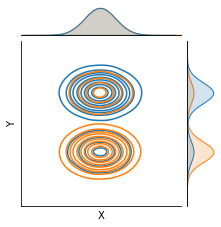

In [211]:
n = 30000
f = 0.2

mu_u1 = np.array([-1,-1])
sig_u1 = (0.25)**2 * np.array([[1,0],[0,1]])
data_u1 = np.random.multivariate_normal(mu_u1, sig_u1, int(f * n))

mu_u2 = np.array([-1,1])
sig_u2 = (0.25)**2 * np.array([[1,0],[0,1]])
data_u2 = np.random.multivariate_normal(mu_u2, sig_u2, int((1-f) * n))

mu_n1 = np.array([-1,-1])
sig_n1 = (0.25)**2 * np.array([[1,0],[0,1]])
data_n1 = np.random.multivariate_normal(mu_n1, sig_n1, int((1-f) * n))

mu_n2 = np.array([-1,1])
sig_n2 = (0.25)**2 * np.array([[1,0],[0,1]])
data_n2 = np.random.multivariate_normal(mu_n2, sig_n2, int(f * n))

data_u = np.concatenate((data_u1, data_u2), axis=0)
data_n = np.concatenate((data_n1, data_n2), axis=0)

plot_distribution(data_u, data_n, bw=0.3, savepath="figures/dist6.png")

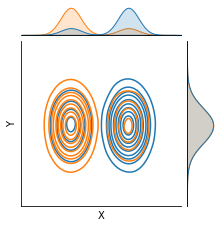

In [214]:
n = 30000
f = 0.2

mu_u1 = np.array([-1,-1])
sig_u1 = (0.25)**2 * np.array([[1,0],[0,1]])
data_u1 = np.random.multivariate_normal(mu_u1, sig_u1, int(f * n))

mu_u2 = np.array([1,-1])
sig_u2 = (0.25)**2 * np.array([[1,0],[0,1]])
data_u2 = np.random.multivariate_normal(mu_u2, sig_u2, int((1-f) * n))

mu_n1 = np.array([-1,-1])
sig_n1 = (0.25)**2 * np.array([[1,0],[0,1]])
data_n1 = np.random.multivariate_normal(mu_n1, sig_n1, int((1-f) * n))

mu_n2 = np.array([1,-1])
sig_n2 = (0.25)**2 * np.array([[1,0],[0,1]])
data_n2 = np.random.multivariate_normal(mu_n2, sig_n2, int(f * n))

data_u = np.concatenate((data_u1, data_u2), axis=0)
data_n = np.concatenate((data_n1, data_n2), axis=0)

plot_distribution(data_u, data_n, bw=0.3, savepath="figures/dist7.png")

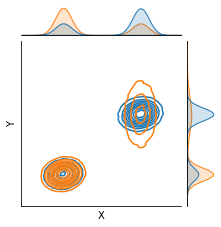

In [212]:
n = 100000
f = 0.3

mu_u1 = np.array([-1,-1])
sig_u1 = (0.2)**2 * np.array([[1,0],[0,1]])
data_u1 = np.random.multivariate_normal(mu_u1, sig_u1, int(f * n))

mu_u2 = np.array([1,1])
sig_u2 = (0.2)**2 * np.array([[1,0],[0,1]])
data_u2 = np.random.multivariate_normal(mu_u2, sig_u2, int((1-f) * n))

mu_n1 = np.array([-1,-1])
sig_n1 = (0.2)**2 * np.array([[1,0],[0,1]])
data_n1 = np.random.multivariate_normal(mu_n1, sig_n1, int((1-f) * n))

mu_n2 = np.array([1,1])
sig_n2 = (0.2)**2 * np.array([[1,0],[0,8]])
data_n2 = np.random.multivariate_normal(mu_n2, sig_n2, int(f * n))

data_u = np.concatenate((data_u1, data_u2), axis=0)
data_n = np.concatenate((data_n1, data_n2), axis=0)

plot_distribution(data_u, data_n, bw=0.08, savepath="figures/dist8.png")

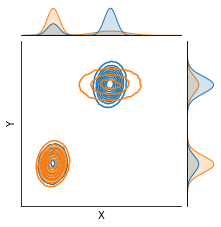

In [213]:
n = 100000
f = 0.3

mu_u1 = np.array([-1,-1])
sig_u1 = (0.2)**2 * np.array([[1,0],[0,1]])
data_u1 = np.random.multivariate_normal(mu_u1, sig_u1, int(f * n))

mu_u2 = np.array([1,1])
sig_u2 = (0.2)**2 * np.array([[1,0],[0,1]])
data_u2 = np.random.multivariate_normal(mu_u2, sig_u2, int((1-f) * n))

mu_n1 = np.array([-1,-1])
sig_n1 = (0.2)**2 * np.array([[1,0],[0,1]])
data_n1 = np.random.multivariate_normal(mu_n1, sig_n1, int((1-f) * n))

mu_n2 = np.array([1,1])
sig_n2 = (0.2)**2 * np.array([[8,0],[0,1]])
data_n2 = np.random.multivariate_normal(mu_n2, sig_n2, int(f * n))

data_u = np.concatenate((data_u1, data_u2), axis=0)
data_n = np.concatenate((data_n1, data_n2), axis=0)

plot_distribution(data_u, data_n, bw=0.08, savepath="figures/dist9.png")